## Walkthrough Material
#### By: Sarah Whitten, CS 344 at Calvin University

This program is an early test version of the final project. Here only two categories are included in the datasets, in
order to make sure those are accurately read-in and learned before adding back in the remaining categories. In the
final version there will be ~200 categories of birds that the program will learn and differentiate between. There are
between 100 and 250 images per bird species category, with about 27,000 in total.

This architecture is based heavily of Chollet's "5.2 Using ConvNets with Small Databases" code that can be found here:
https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/5.2-using-convnets-with-small-datasets.ipynb

The code is modified to take in two sample bird species, the American Bittern and the Alexandrine Parakeet.

In [2]:
import keras
import os, shutil

# The path to the directory where the original
# dataset was uncompressed
original_dataset_dir = '/home/smw42/Documents/cs344/newproject/'

# The directory where we will
# store our smaller dataset
base_dir = '/home/smw42/Documents/project344/pres_birds'
os.mkdir(base_dir)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'valid')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# Directory with our training cat pictures
train_am_bitt_dir = os.path.join(train_dir, 'am_bitt')
os.mkdir(train_am_bitt_dir)

# Directory with our training dog pictures
train_alex_par_dir = os.path.join(train_dir, 'alex_par')
os.mkdir(train_alex_par_dir)

# Directory with our validation cat pictures
validation_am_bitt_dir = os.path.join(validation_dir, 'am_bitt')
os.mkdir(validation_am_bitt_dir)

# Directory with our validation dog pictures
validation_alex_par_dir = os.path.join(validation_dir, 'alex_par')
os.mkdir(validation_alex_par_dir)

# Directory with our validation cat pictures
test_am_bitt_dir = os.path.join(test_dir, 'am_bitt')
os.mkdir(test_am_bitt_dir)

# Directory with our validation dog pictures
test_alex_par_dir = os.path.join(test_dir, 'alex_par')
os.mkdir(test_alex_par_dir)

# Copy first first half of american bittern images to train_am_bitt_dir
fnames = ['{0:0=3d}.jpg'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'am_bitt/', fname)
    dst = os.path.join(train_am_bitt_dir, fname)
    shutil.copyfile(src, dst)

# Copy next quarter of american bittern images to validation_am_bitt_dir
fnames = ['{0:0=3d}.jpg'.format(i) for i in range(90, 135)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'am_bitt/', fname)
    dst = os.path.join(validation_am_bitt_dir, fname)
    shutil.copyfile(src, dst)

# Copy remaining american bittern images to test_am_bitt_dir
fnames = ['{0:0=3d}.jpg'.format(i) for i in range(135, 175)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'am_bitt/', fname)
    dst = os.path.join(test_am_bitt_dir, fname)
    shutil.copyfile(src, dst)

# Copy first half of alexandrine parakeet images to train_alex_par_dir
fnames = ['{0:0=3d}.jpg'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'alex_par/', fname)
    dst = os.path.join(train_alex_par_dir, fname)
    shutil.copyfile(src, dst)

# Copy next quarter of alexandrine parakeet images to validation_alex_par_dir
fnames = ['{0:0=3d}.jpg'.format(i) for i in range(90, 135)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'alex_par/', fname)
    dst = os.path.join(validation_alex_par_dir, fname)
    shutil.copyfile(src, dst)

# Copy remaining alexandrine parakeet images to test_alex_par_dir
fnames = ['{0:0=3d}.jpg'.format(i) for i in range(135, 171)]
for fname in fnames:
    src = os.path.join(original_dataset_dir+'alex_par/', fname)
    dst = os.path.join(test_alex_par_dir, fname)
    shutil.copyfile(src, dst)

In [3]:
print('total training am_bitt images:', len(os.listdir(train_am_bitt_dir)))
print('total training alex_par images:', len(os.listdir(train_alex_par_dir)))
print('total validation am_bitt images:', len(os.listdir(validation_am_bitt_dir)))
print('total validation alex_par images:', len(os.listdir(validation_alex_par_dir)))
print('total test am_bitt images:', len(os.listdir(test_am_bitt_dir)))
print('total test alex_par images:', len(os.listdir(test_alex_par_dir)))

total training am_bitt images: 90
total training alex_par images: 90
total validation am_bitt images: 45
total validation alex_par images: 45
total test am_bitt images: 40
total test alex_par images: 36


In [4]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
______________________________________

In [5]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 180 images belonging to 2 classes.
Found 90 images belonging to 2 classes.


In [7]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [8]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)


Epoch 1/10
100/100 [==============================] - 31s 312ms/step - loss: 0.4814 - acc: 0.7625 - val_loss: 0.2881 - val_acc: 0.9444

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

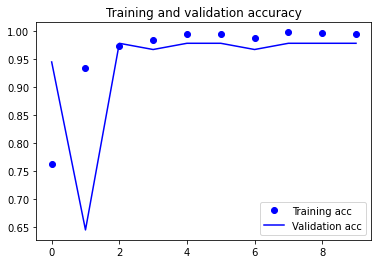

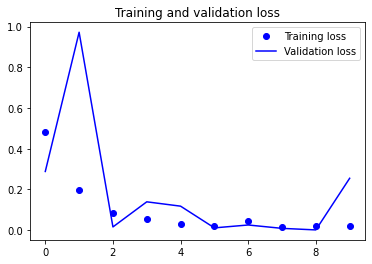

In [10]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

This model works great for just two input categories! The testing set finished with an accuracy of about 99.5% while
the validation set finished with an accuracy of about 97.7%. Unfortunately, due to technical difficulties I was only
able to get these two species working before the walkthrough with Professor Vander Linden.